In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 9s 21ms/step - loss: 2.3589 - accuracy: 0.1016 - val_loss: 2.3033 - val_accuracy: 0.1039
Epoch 2/2
375/375 [==============================] - 9s 23ms/step - loss: 2.3036 - accuracy: 0.1076 - val_loss: 2.3015 - val_accuracy: 0.1103
Epoch 1/2
375/375 [==============================] - 10s 26ms/step - loss: 2.3134 - accuracy: 0.1046 - val_loss: 2.3071 - val_accuracy: 0.0994
Epoch 2/2
375/375 [==============================] - 10s 27ms/step - loss: 2.3003 - accuracy: 0.1163 - val_loss: 2.3113 - val_accuracy: 0.0996


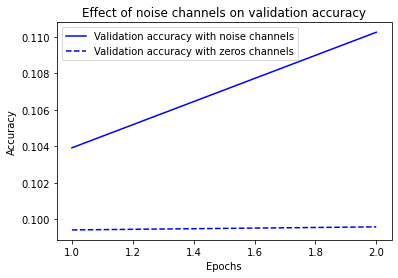

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1,3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 2.3169 - accuracy: 0.1060 - val_loss: 2.3071 - val_accuracy: 0.1006
Epoch 2/2
375/375 [==============================] - 5s 13ms/step - loss: 2.2995 - accuracy: 0.1175 - val_loss: 2.3157 - val_accuracy: 0.1012


In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 803.2358 - accuracy: 0.3348 - val_loss: 2.0801 - val_accuracy: 0.2632
Epoch 2/2
375/375 [==============================] - 5s 14ms/step - loss: 5.8642 - accuracy: 0.2441 - val_loss: 3.4198 - val_accuracy: 0.2654


In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 0.3696 - accuracy: 0.9126 - val_loss: 0.1665 - val_accuracy: 0.9564
Epoch 2/2
375/375 [==============================] - 5s 13ms/step - loss: 0.1384 - accuracy: 0.9641 - val_loss: 0.1671 - val_accuracy: 0.9638


In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 0.6651 - accuracy: 0.8403 - val_loss: 0.3555 - val_accuracy: 0.9061
Epoch 2/2
375/375 [==============================] - 1s 4ms/step - loss: 0.3494 - accuracy: 0.9035 - val_loss: 0.3085 - val_accuracy: 0.9137


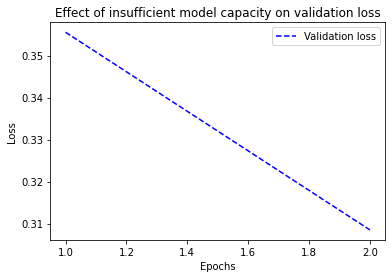

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1,3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 6ms/step - loss: 0.3621 - accuracy: 0.8969 - val_loss: 0.1807 - val_accuracy: 0.9480
Epoch 2/2
375/375 [==============================] - 3s 7ms/step - loss: 0.1625 - accuracy: 0.9518 - val_loss: 0.1351 - val_accuracy: 0.9597


In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 62ms/step - loss: 0.5722 - accuracy: 0.7315 - val_loss: 0.4691 - val_accuracy: 0.8360
Epoch 2/2
30/30 [==============================] - 2s 62ms/step - loss: 0.3824 - accuracy: 0.8847 - val_loss: 0.3516 - val_accuracy: 0.8795


In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 84ms/step - loss: 0.6216 - accuracy: 0.6548 - val_loss: 0.5697 - val_accuracy: 0.7797
Epoch 2/2
30/30 [==============================] - 1s 45ms/step - loss: 0.5298 - accuracy: 0.7938 - val_loss: 0.5247 - val_accuracy: 0.8280


In [ ]:

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 12s 374ms/step - loss: 0.5422 - accuracy: 0.7740 - val_loss: 0.4213 - val_accuracy: 0.8005
Epoch 2/2
30/30 [==============================] - 9s 302ms/step - loss: 0.2571 - accuracy: 0.9003 - val_loss: 0.2720 - val_accuracy: 0.8920


In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 57ms/step - loss: 0.5841 - accuracy: 0.7851 - val_loss: 0.4619 - val_accuracy: 0.8655
Epoch 2/2
30/30 [==============================] - 1s 35ms/step - loss: 0.3890 - accuracy: 0.8978 - val_loss: 0.3934 - val_accuracy: 0.8819


In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 57ms/step - loss: 0.6444 - accuracy: 0.6131 - val_loss: 0.5382 - val_accuracy: 0.8372
Epoch 2/2
30/30 [==============================] - 1s 37ms/step - loss: 0.5391 - accuracy: 0.7349 - val_loss: 0.4408 - val_accuracy: 0.8631
